<a href="https://colab.research.google.com/github/ishankarve/Linear-Regression/blob/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/Bike%20Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Import Data**

In [3]:
#import data from gihub link
df_bikeshare=pd.read_csv("https://raw.githubusercontent.com/ishankarve/Linear-Regression/main/Multiple%20Linear%20Regression%20in%20Python/Assignment/day.csv")

In [4]:
df_bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Step 3: Undertake sanity checks on data**

In [5]:
#get shape of the dataframe
df_bikeshare.shape

(730, 16)

In [6]:
#check column dtypes
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#get list of unique variables per column
print(df_bikeshare.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [8]:
# get count of non-na values across all columns
df_bikeshare.apply(lambda x: x.count(), axis=0)

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [9]:
# convert 'dteday' from 'object' to 'datetime'
df_bikeshare['dteday'] = pd.to_datetime(df_bikeshare['dteday'], format='%d-%m-%Y') #date is in 01-01-2018 format

In [10]:
#describe dataframe
df_bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Step 4: Cleaning & Binning Numerical Data**

In [11]:
# binning windspeed data as per Beaufort Scale (https://www.rmets.org/metmatters/beaufort-scale)
# Note: Since temperature is in metric units (deg Celsius), it is assumed that windspeed is in Km/Hr

#bin_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Calm','Light_air','Light_Breeze','Gentle_Breeze','Moderate_Breeze','Fresh_Breeze','Strong_Breeze','Moderate_Gale','Fresh_Gale','Strong_Gale','Whole_Gale','Storm','Hurricane']

bins = [0, 1, 5, 11, 19, 28, 38, 49, 61, 74, 88, 102, 117,300]
df_bikeshare['windspeed_binned'] = pd.cut(df_bikeshare['windspeed'], bins=bins, labels=bin_labels)

In [12]:
# binning temperature data as per comfort Scale (http://www.city-data.com/forum/weather/1620160-your-personal-temperature-colors-descriptors.html)
# data is binned as follows
# data is binned on a scale of 1 to 12
# 12- 45C & up: extremely hot 
# 11- 40 to 45C: very hot 
# 10- 35 to 40C: hot 
# 09- 30 to 35C: quite warm 
# 08 -20 to 30C: ideal 
# 07- 15 to 20C: lower than ideal 
# 06- 10 to 15C: cool 
# 05- 5 to 10C: quite cool 
# 04- 0 to 5C: cold 
# 03 -5 to 0C: very cold 
# 02- -10 to -5C: freezing 
# 01- -15 to -10C: frigid

#bin_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
bin_labels = ['Frigid','Freezing','Very_Cold','Cold','Quite_Cool','Cool','Lower_Ideal','Ideal','Quite_Warm','Hot','Very_Hot','Extremely_Hot']
bins = [-15,-10,-5,0,5,10,15,20,30,35,40,45,60]
df_bikeshare['temp_binned'] = pd.cut(df_bikeshare['temp'], bins=bins, labels=bin_labels)

In [13]:
#extracting day from date
df_bikeshare["day"]=df_bikeshare.dteday.dt.day

In [14]:
#binning months into quarters (1st,2nd,3rd,4th)
bin_labels = ['First', 'Second', 'Third', 'Fourth']
bins = [0,3,6,8,12]
df_bikeshare['quarter'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

***Lesson Learnt: Binning of continious variables is a `bad idea` for regression analysis, but is useful while undertaking EDA***

### **Step 5: Prelimnary Visualisation**
Since all data is numeric, we can use plots to visualise data 

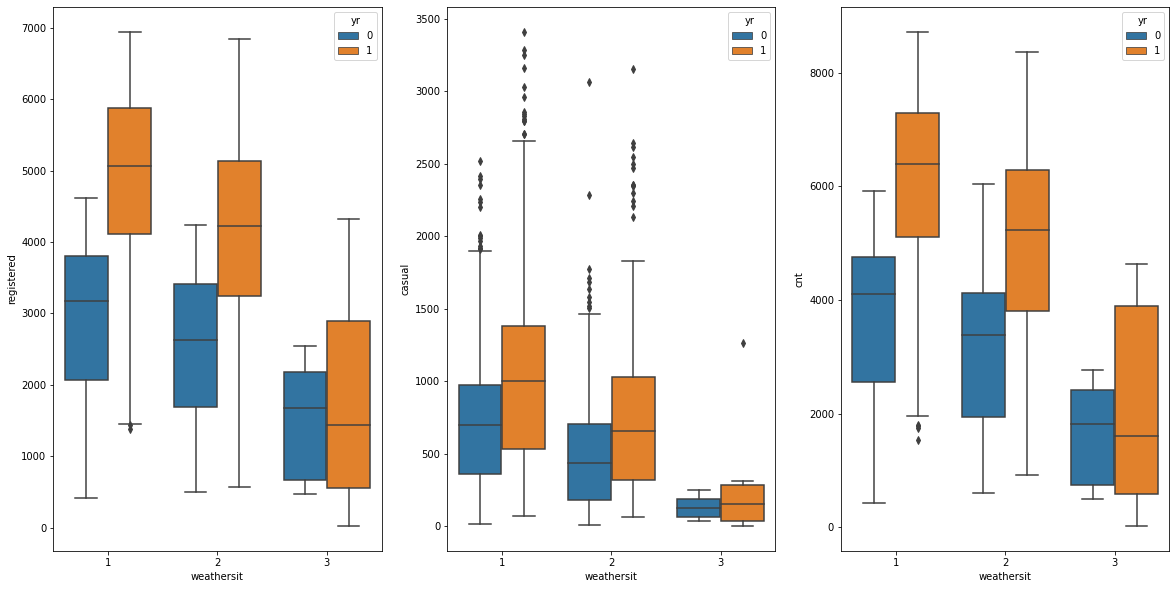

In [15]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weathersit', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

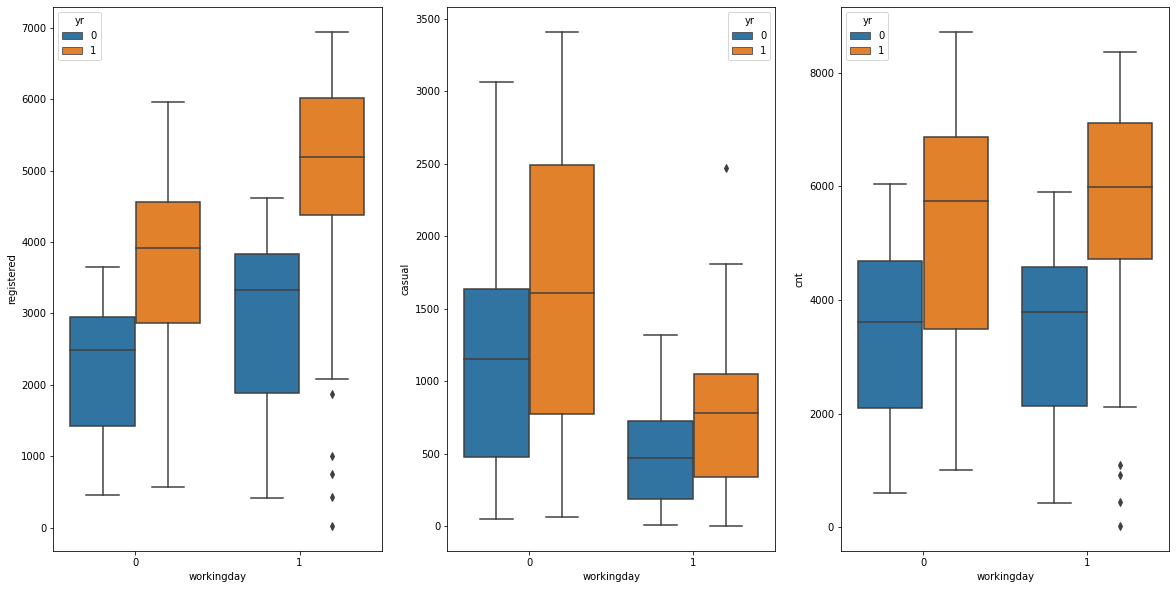

In [16]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'workingday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

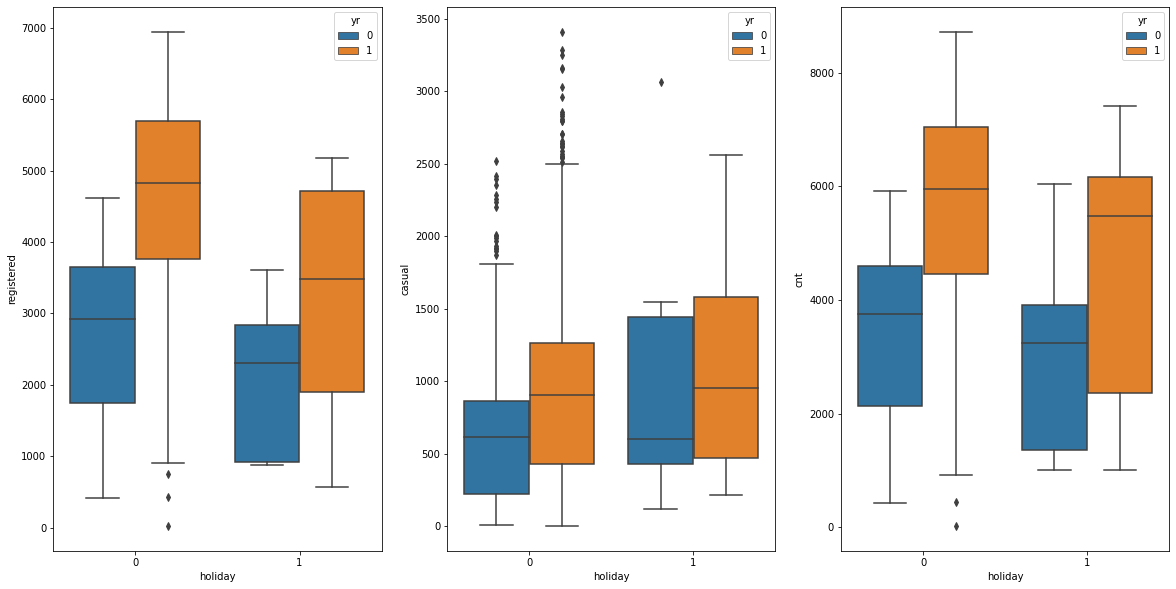

In [17]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'holiday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'holiday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

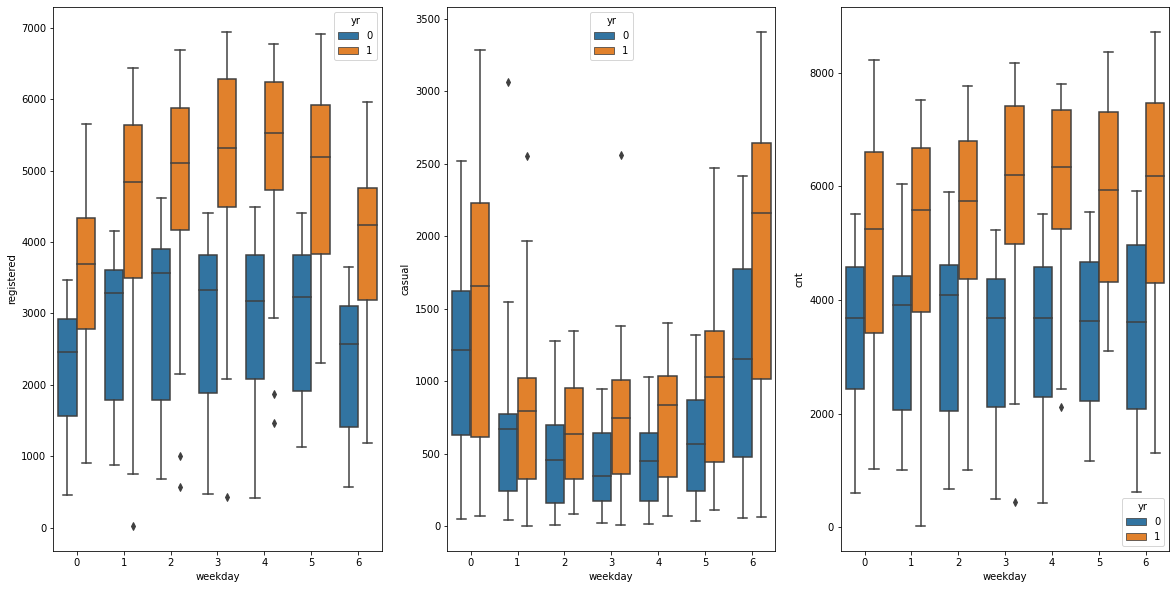

In [18]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

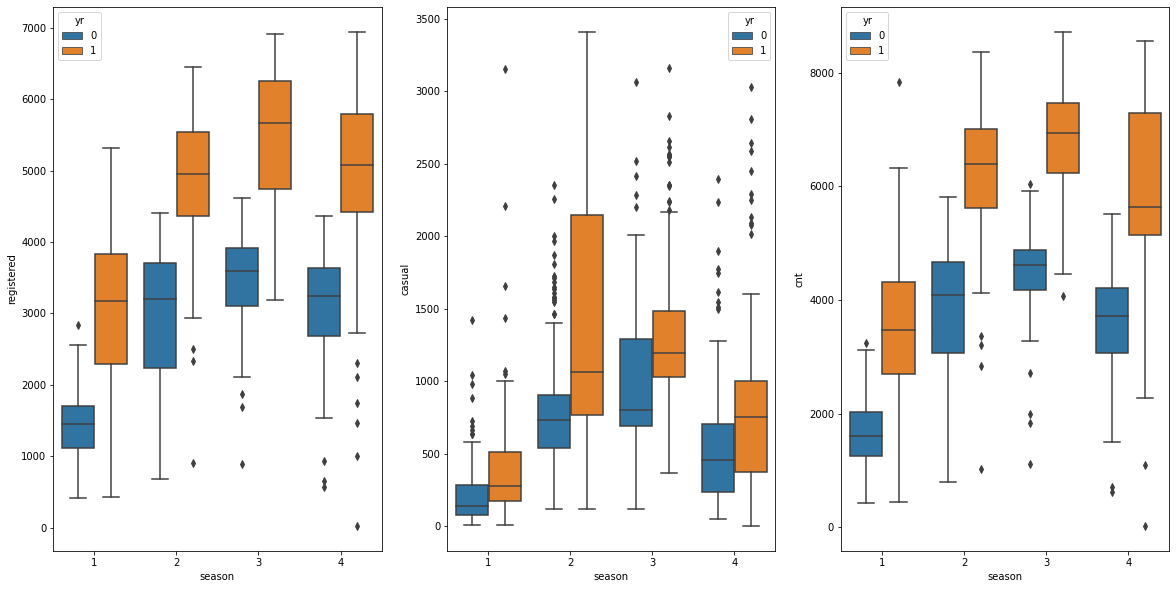

In [19]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'season', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

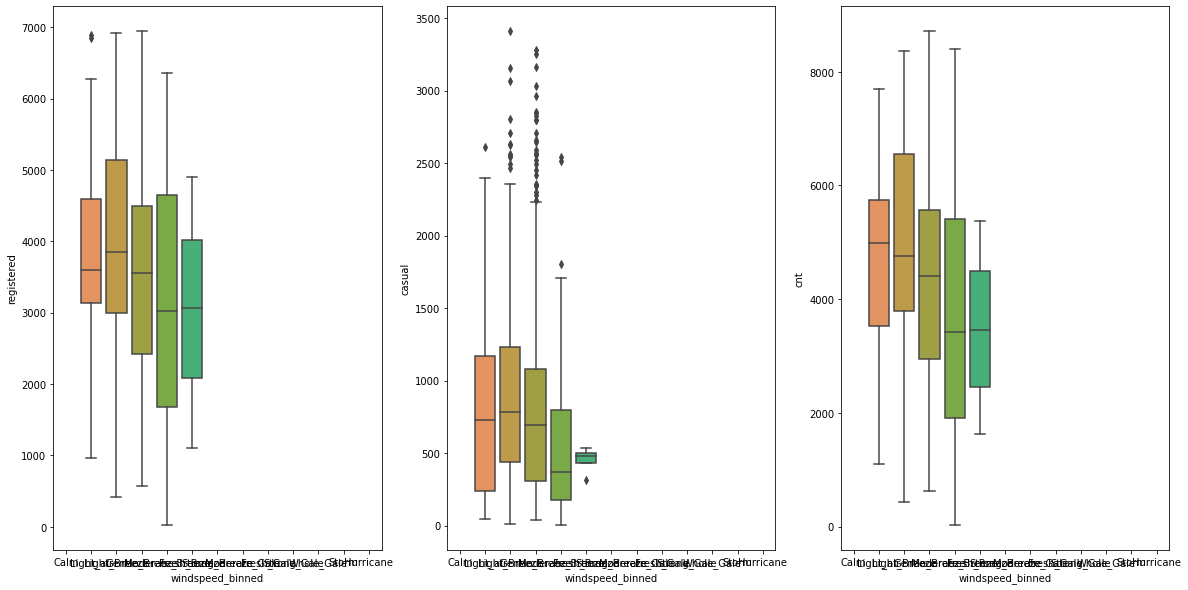

In [20]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'windspeed_binned', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'windspeed_binned', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'windspeed_binned', y = 'cnt', data = df_bikeshare)
plt.show()

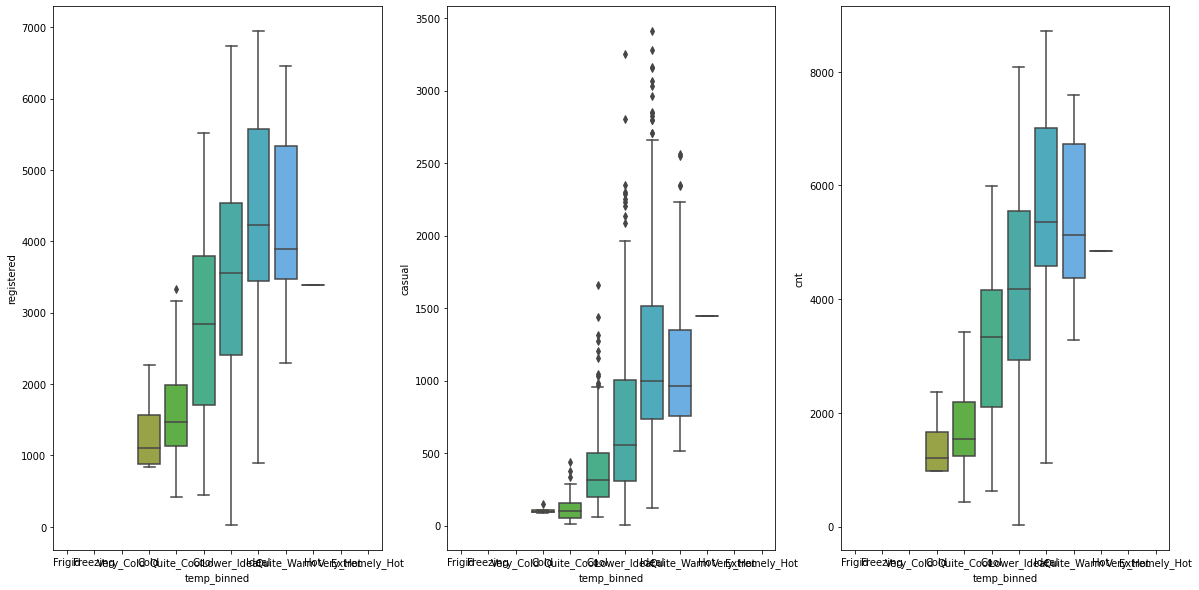

In [21]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'temp_binned', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'temp_binned', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'temp_binned', y = 'cnt', data = df_bikeshare)
plt.show()

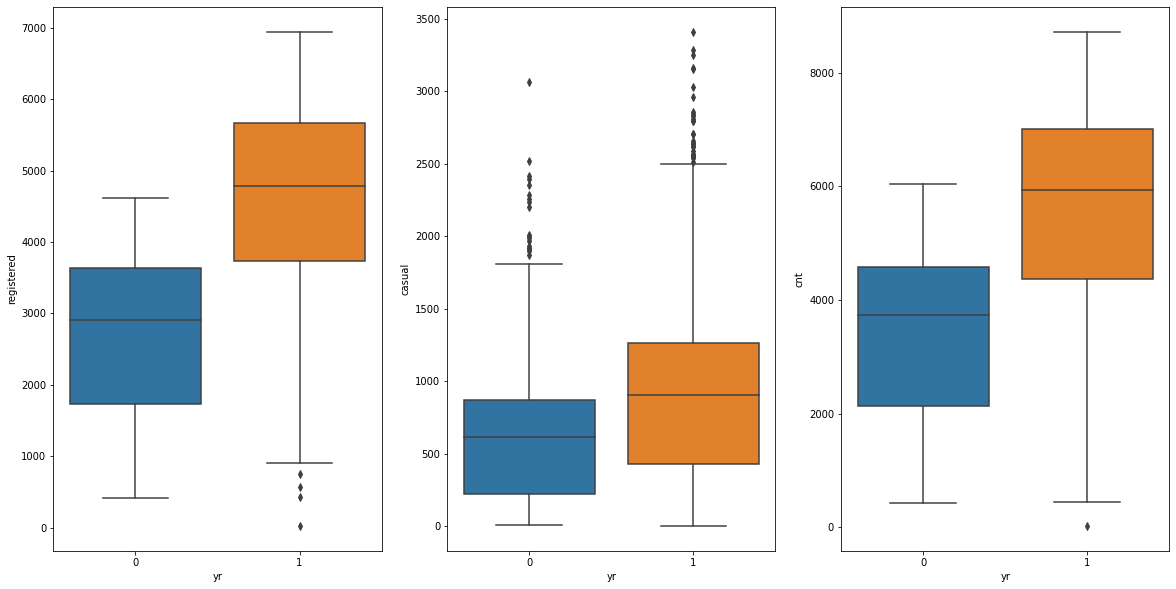

In [22]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikeshare)
plt.show()

In [23]:
#plot chart per day to find specific days where surge can be expected

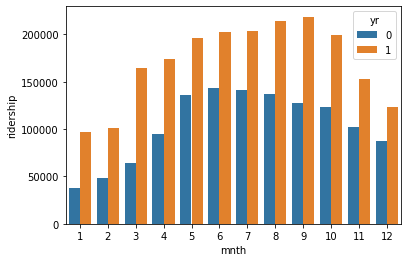

In [24]:
#plot variation across months
# perform groupby
df = df_bikeshare.groupby(['mnth','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="mnth",y="ridership",hue="yr",data=df)

plt.show()

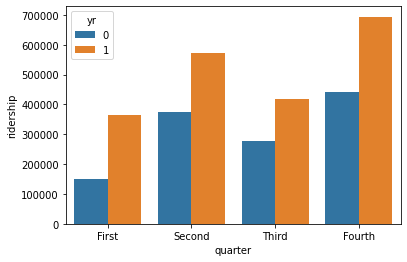

In [25]:
#plot variation across quarters
# perform groupby
df = df_bikeshare.groupby(['quarter','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="quarter",y="ridership",hue='yr',data=df)

plt.show()

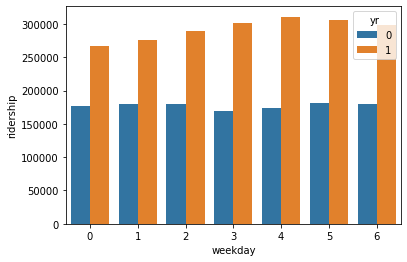

In [26]:
#plot variation across weekdays
# perform groupby
df = df_bikeshare.groupby(['weekday','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="weekday",y="ridership",hue='yr',data=df)

plt.show()

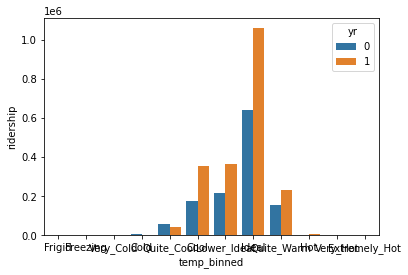

In [27]:
#plot variation across temperature conditions
# perform groupby
df = df_bikeshare.groupby(['temp_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="temp_binned",y="ridership",hue='yr',data=df)

plt.show()

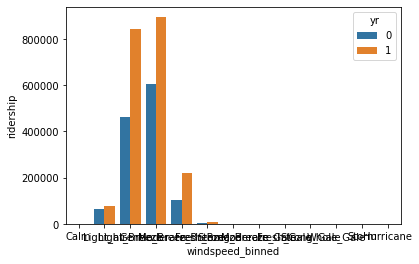

In [28]:
#plot variation across wind conditions
# perform groupby
df = df_bikeshare.groupby(['windspeed_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="windspeed_binned",y="ridership",hue='yr',data=df)

plt.show()

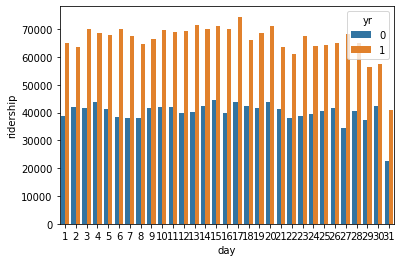

In [29]:
#plot variation across day
# perform groupby
df = df_bikeshare.groupby(['day','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="day",y="ridership",hue='yr',data=df)

plt.show()

In [30]:
print(df_bikeshare.nunique())

instant             730
dteday              730
season                4
yr                    2
mnth                 12
holiday               2
weekday               7
workingday            2
weathersit            3
temp                498
atemp               689
hum                 594
windspeed           649
casual              605
registered          678
cnt                 695
windspeed_binned      5
temp_binned           7
day                  31
quarter               4
dtype: int64


In [31]:
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'windspeed_binned', 'temp_binned', 'day',
       'quarter'],
      dtype='object')

### **Step 6: Creating Dummy Variables**

In [32]:
#create dummy variables for `windspeed_binned`, `temp_binned`, ` quarter`
windspeed_dummy = pd.get_dummies(df_bikeshare['windspeed_binned'])
temp_dummy = pd.get_dummies(df_bikeshare['temp_binned'])
quarter_dummy = pd.get_dummies(df_bikeshare['quarter'])

In [33]:
#check variables
print(windspeed_dummy.nunique())
print(temp_dummy.nunique())
print(quarter_dummy.nunique())

Calm               1
Light_air          2
Light_Breeze       2
Gentle_Breeze      2
Moderate_Breeze    2
Fresh_Breeze       2
Strong_Breeze      1
Moderate_Gale      1
Fresh_Gale         1
Strong_Gale        1
Whole_Gale         1
Storm              1
Hurricane          1
dtype: int64
Frigid           1
Freezing         1
Very_Cold        1
Cold             2
Quite_Cool       2
Cool             2
Lower_Ideal      2
Ideal            2
Quite_Warm       2
Hot              2
Very_Hot         1
Extremely_Hot    1
dtype: int64
First     2
Second    2
Third     2
Fourth    2
dtype: int64


In [34]:
quarter_dummy.tail(20)

,First,Second,Third,Fourth
710,0,0,0,1
711,0,0,0,1
712,0,0,0,1
713,0,0,0,1
714,0,0,0,1
715,0,0,0,1
716,0,0,0,1
717,0,0,0,1
718,0,0,0,1
719,0,0,0,1


In [35]:
#drop columns where there is no variable diversity
windspeed_dummy.drop(['Calm', 'Strong_Breeze', 'Moderate_Gale','Fresh_Gale','Strong_Gale','Whole_Gale','Storm','Hurricane'], axis=1, inplace=True)
temp_dummy.drop(['Frigid','Freezing','Very_Cold','Very_Hot','Extremely_Hot'], axis=1, inplace=True)
quarter_dummy.drop(['First'], axis=1, inplace=True) #variable can be described by balance three

In [36]:
#concat it to the main dataframe
df_bikeshare = pd.concat([df_bikeshare, windspeed_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, temp_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, quarter_dummy], axis = 1)
#drop original columns windspeed and temp
df_bikeshare.drop(['windspeed_binned', 'windspeed', 'temp_binned','temp', 'quarter'], axis = 1, inplace = True)
df_bikeshare.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,...,Cold,Quite_Cool,Cool,Lower_Ideal,Ideal,Quite_Warm,Hot,Second,Third,Fourth
0,1,2018-01-01,1,0,1,0,6,0,2,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-01-02,1,0,1,0,0,0,2,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,3,2018-01-03,1,0,1,0,1,1,1,9.47025,...,0,1,0,0,0,0,0,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,10.60610,...,0,1,0,0,0,0,0,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,11.46350,...,0,1,0,0,0,0,0,0,0,0
5,6,2018-01-06,1,0,1,0,4,1,1,11.66045,...,0,1,0,0,0,0,0,0,0,0
6,7,2018-01-07,1,0,1,0,5,1,2,10.44195,...,0,1,0,0,0,0,0,0,0,0
7,8,2018-01-08,1,0,1,0,6,0,2,8.11270,...,0,1,0,0,0,0,0,0,0,0
8,9,2018-01-09,1,0,1,0,0,0,1,5.80875,...,0,1,0,0,0,0,0,0,0,0
9,10,2018-01-10,1,0,1,0,1,1,1,7.54440,...,0,1,0,0,0,0,0,0,0,0


### **Step 7: Splitting and Scaling data**

In [37]:
#check dataframe
print(df_bikeshare.nunique())

instant            730
dteday             730
season               4
yr                   2
mnth                12
holiday              2
weekday              7
workingday           2
weathersit           3
atemp              689
hum                594
casual             605
registered         678
cnt                695
day                 31
Light_air            2
Light_Breeze         2
Gentle_Breeze        2
Moderate_Breeze      2
Fresh_Breeze         2
Cold                 2
Quite_Cool           2
Cool                 2
Lower_Ideal          2
Ideal                2
Quite_Warm           2
Hot                  2
Second               2
Third                2
Fourth               2
dtype: int64


In [38]:
## before we split the data we are going to copy the data in three dataframes for 3 modelling strategies

#copy dataframe
s1_df=df_bikeshare.copy()
s2_df=df_bikeshare.copy()
s3_df=df_bikeshare.copy()

In [39]:
#drop redundant columns from dataframe
s1_df.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)

In [40]:
#splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
s1_train, s1_test = train_test_split(s1_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
s1_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'cnt', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold',
       'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot',
       'Second', 'Third', 'Fourth'],
      dtype='object')

In [42]:
#set up scaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except  'cnt' variable
num_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold',
       'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot',
       'Second', 'Third', 'Fourth']
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [43]:
s1_train.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,cnt,...,Cold,Quite_Cool,Cool,Lower_Ideal,Ideal,Quite_Warm,Hot,Second,Third,Fourth
653,1.000000,1.0,0.818182,0.0,0.333333,1.0,0.0,0.501133,0.575354,7534,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.766351,0.725633,7216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.438975,0.640189,4066,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.200348,0.498067,1796,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.391735,0.504508,4220,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
111,0.333333,0.0,0.272727,0.0,0.833333,1.0,0.5,0.318819,0.751824,1683,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
580,0.666667,1.0,0.636364,0.0,1.000000,0.0,0.0,0.882350,0.632030,6824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
500,0.333333,1.0,0.363636,0.0,0.500000,1.0,0.0,0.678508,0.719193,7424,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
479,0.333333,1.0,0.272727,0.0,0.500000,1.0,0.0,0.513565,0.440962,6196,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
472,0.333333,1.0,0.272727,0.0,0.500000,1.0,0.5,0.496135,0.586518,4367,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


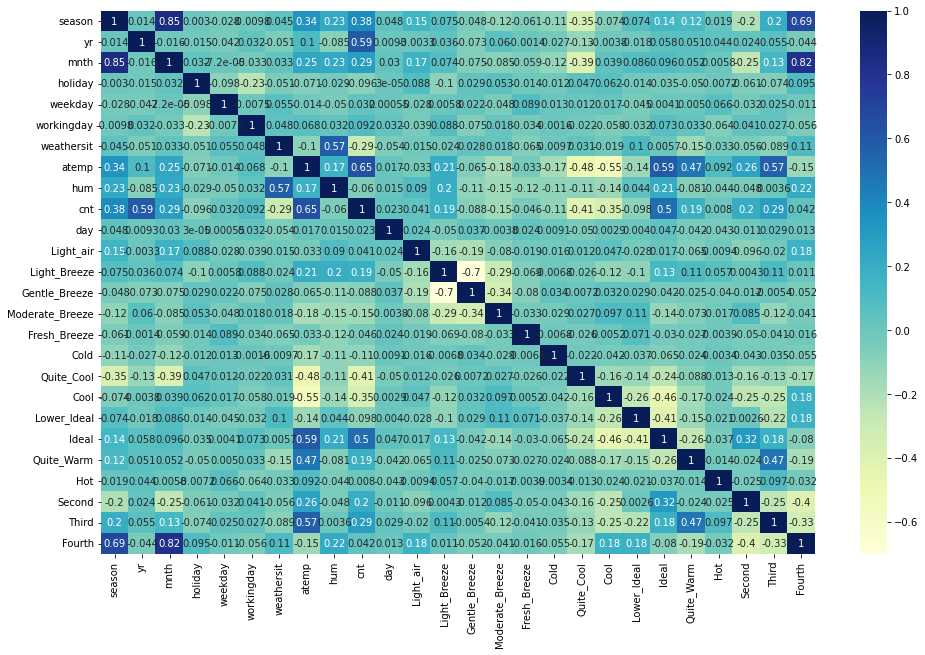

In [44]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(s1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Since `cnt` appears to have a strong correlation with `temp_binned`, view the relationship using a `pair plot`

In [45]:
#check column dtypes
s1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           510 non-null    float64
 1   yr               510 non-null    float64
 2   mnth             510 non-null    float64
 3   holiday          510 non-null    float64
 4   weekday          510 non-null    float64
 5   workingday       510 non-null    float64
 6   weathersit       510 non-null    float64
 7   atemp            510 non-null    float64
 8   hum              510 non-null    float64
 9   cnt              510 non-null    int64  
 10  day              510 non-null    float64
 11  Light_air        510 non-null    float64
 12  Light_Breeze     510 non-null    float64
 13  Gentle_Breeze    510 non-null    float64
 14  Moderate_Breeze  510 non-null    float64
 15  Fresh_Breeze     510 non-null    float64
 16  Cold             510 non-null    float64
 17  Quite_Cool     

###### **Checking for Multicollinearity using recursive method**

In [46]:
#function to manipulate sequence of columns of a given dataframe
#Reference: https://stackoverflow.com/questions/12329853/how-to-rearrange-pandas-column-sequence
# reorder columns
def set_column_sequence(dataframe, seq, front=True):

  '''Takes a dataframe and a subsequence of its columns,
  returns dataframe with seq as first columns if "front" is True,
  and seq as last columns if "front" is False.
  '''
  cols = seq[:] # copy so we don't mutate seq
  for x in dataframe.columns:
    if x not in cols:
      if front:
        #we want "seq" to be in the front
        #so append current column to the end of the list
        cols.append(x)
      else:
        #we want "seq" to be last, so insert this
        #column in the front of the new column list
        #"cols" we are building:
        cols.insert(0, x)
  return dataframe[cols]


In [47]:
##reference: https://www.geeksforgeeks.org/multicollinearity-in-data/
#create a test dataframe
vif_df=s1_train.copy()
#shuffle the column ordering
#import random
#column_shuffle=vif_df.columns.tolist() #convert pandas index to list
#random.shuffle(column_shuffle) #shuffle list
#shuffle dataframe columns
#set_column_sequence(vif_df, column_shuffle, front=True) #not required


# Remove the price from the dataset
Y = vif_df["cnt"]
iv = vif_df.columns
iv = iv.delete(0)
X = vif_df[iv]

# calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
# compare with each column
[vif(vif_df[iv].values, index) for index in range(len(iv))]
 
# Removing multicollinearity from the dataset using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(vif_df[iv].values, index) for index in range(len(iv))]
    maxvif = max(vif_list)

                       
    drop_index = vif_list.index(maxvif)
    print("Max VIF value is {} for independent variable {}.".format(maxvif,iv[drop_index]))  
    
    if maxvif > 4.99:
        
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
        print("Final Independent_variables are {}\n".format(iv))

Max VIF value is inf for independent variable Light_air.
Deleting Light_air
Final Independent_variables are Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp',
       'hum', 'cnt', 'day', 'Light_Breeze', 'Gentle_Breeze', 'Moderate_Breeze',
       'Fresh_Breeze', 'Cold', 'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal',
       'Quite_Warm', 'Hot', 'Second', 'Third', 'Fourth'],
      dtype='object')

Max VIF value is 93.03285022117419 for independent variable Ideal.
Deleting Ideal
Final Independent_variables are Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp',
       'hum', 'cnt', 'day', 'Light_Breeze', 'Gentle_Breeze', 'Moderate_Breeze',
       'Fresh_Breeze', 'Cold', 'Quite_Cool', 'Cool', 'Lower_Ideal',
       'Quite_Warm', 'Hot', 'Second', 'Third', 'Fourth'],
      dtype='object')

Max VIF value is 62.21567307050126 for independent variable atemp.
Deleting atemp
Final Independent_variables are Index(['yr', 'mnth', 'holiday', 'week

#### Splitting into sub set

In [48]:
y_train = s1_train.pop('cnt')
X_train = s1_train

### Step 8: Building a linear regression model

**Adding Variables that are correlated based on VIF analysis** 
###### *Iteration 1*

In [49]:
X_train_lm = X_train[iv]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit() #create model
print(lr.params)
print(lr.summary())

const              3865.994017
yr                 2080.881277
holiday            -567.747786
weekday             433.005384
workingday          158.454641
weathersit        -1882.926540
day                -133.528908
Light_Breeze        115.078682
Moderate_Breeze    -507.473302
Fresh_Breeze       -973.860564
Cold              -2972.289458
Quite_Cool        -2563.325199
Cool              -2010.100382
Lower_Ideal       -1121.493303
Quite_Warm         -421.556971
Hot               -2454.457401
Second              681.645702
Third               826.203822
Fourth             1009.195587
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          2.29e-173
T

In [50]:
#Calculate VIF to check multicollinearity
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.05
17,Third,2.77
16,Second,2.50
18,Fourth,2.08
12,Cool,1.86
11,Quite_Cool,1.74
13,Lower_Ideal,1.48
14,Quite_Warm,1.34
7,Light_Breeze,1.15
8,Moderate_Breeze,1.15


In [51]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

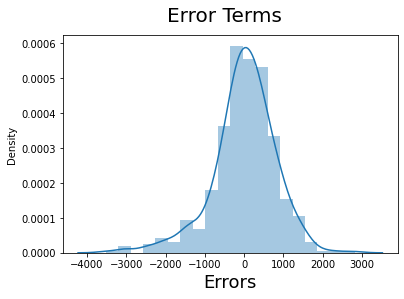

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


### **Step 9: Making prediction based on model coeff.**

###### ***Scaling Test Set***

In [53]:
num_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold',
       'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot',
       'Second', 'Third', 'Fourth']
s1_test[num_vars] = scaler.transform(s1_test[num_vars])


In [54]:
s1_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,cnt,...,Cold,Quite_Cool,Cool,Lower_Ideal,Ideal,Quite_Warm,Hot,Second,Third,Fourth
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.532991,0.638508,4546.981735,...,0.004566,0.077626,0.205479,0.191781,0.397260,0.123288,0.0,0.273973,0.164384,0.328767
std,0.369821,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.217888,0.148974,1898.633630,...,0.067574,0.268194,0.404977,0.394604,0.490452,0.329520,0.0,0.447017,0.371472,0.470841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,441.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.344751,0.527265,3303.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.549198,0.627737,4579.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.714132,0.743928,5869.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,8395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


###### ***Splitting Test Data***

In [55]:
y_test = s1_test.pop('cnt')
X_test = s1_test

In [56]:
#adding constant
X_test = sm.add_constant(X_test)

In [57]:
X_test.columns

Index(['const', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'day', 'Light_air', 'Light_Breeze',
       'Gentle_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold',
       'Quite_Cool', 'Cool', 'Lower_Ideal', 'Ideal', 'Quite_Warm', 'Hot',
       'Second', 'Third', 'Fourth'],
      dtype='object')

In [58]:
# dropping redundant variables
X_test = X_test[['const','yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'day',
       'Light_Breeze', 'Moderate_Breeze', 'Fresh_Breeze', 'Cold', 'Quite_Cool',
       'Cool', 'Lower_Ideal', 'Quite_Warm', 'Hot', 'Second', 'Third',
       'Fourth']]
X_test.head()    

,const,yr,holiday,weekday,workingday,weathersit,day,Light_Breeze,Moderate_Breeze,Fresh_Breeze,Cold,Quite_Cool,Cool,Lower_Ideal,Quite_Warm,Hot,Second,Third,Fourth
184,1.0,0.0,1.0,0.166667,0.0,0.5,0.100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1.0,1.0,0.0,0.500000,1.0,0.0,0.633333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
299,1.0,0.0,0.0,0.666667,1.0,0.5,0.866667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
221,1.0,0.0,0.0,0.500000,1.0,0.0,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
152,1.0,0.0,0.0,0.666667,1.0,0.0,0.033333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
# Making predictions using model

y_pred = lr.predict(X_test)

### **Step 10: Model Evaluation**

Text(0, 0.5, 'y_pred')

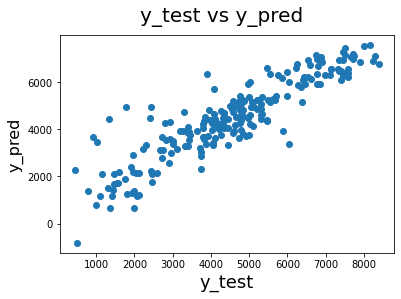

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


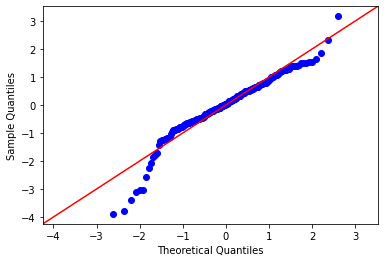

In [61]:
sm.qqplot((y_test - y_pred), fit=True, line='45')
plt.show()

Text(0.5, 0, 'Errors')

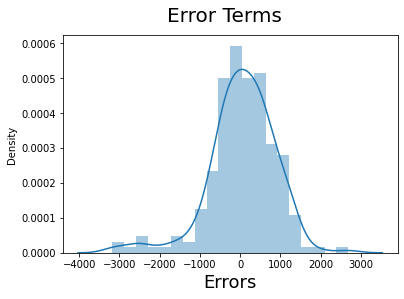

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

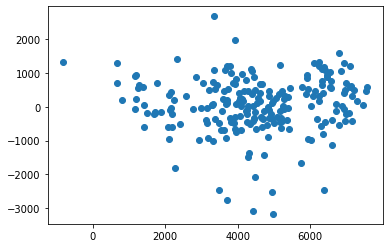

12056.138095236887

In [63]:
plt.scatter(y_pred,(y_test - y_pred))
plt.show()
(y_test-y_pred).sum()

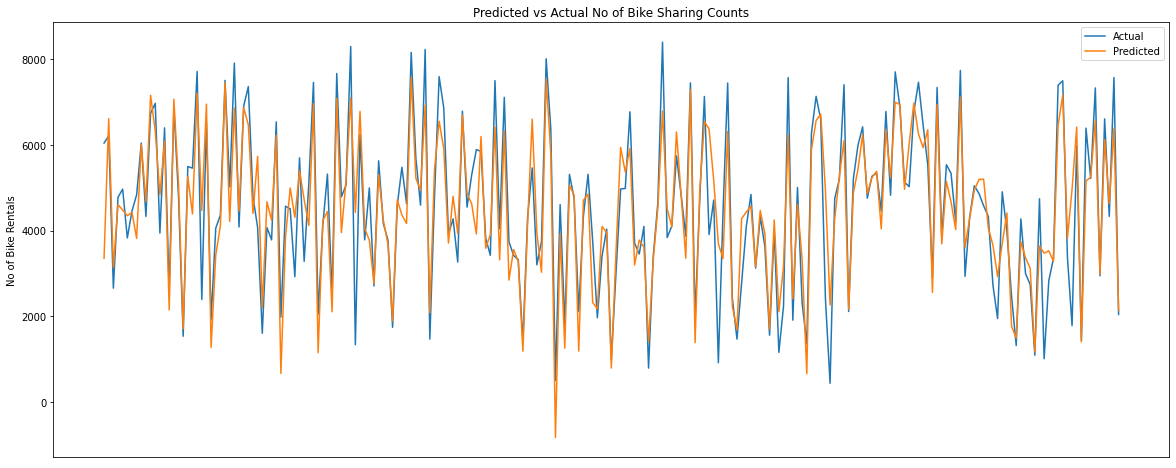

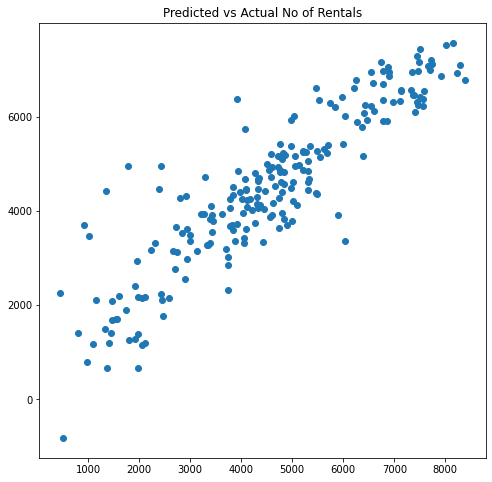

In [65]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


In [67]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
rsquared_test = r2_score(y_test, y_pred)
rsquared_train = r2_score(y_train, y_train_cnt)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.83
R-squared for test data: 0.81
Mean Squared Error 692975.228
